<a href="https://colab.research.google.com/github/frontloss/iNeuron-assignments/blob/master/Matplotlib_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import required libraries

In [1]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from scipy import optimize
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
max_temperature = np.array([39,41,43,47,49,51,45,38,37,29,27,25])
min_temperature = np.array([21,23,27,28,32,35,31,28,21,19,17,18])
month = np.arange(1,13)

### Fitting using Simple Exponential Smoothing function.

An exponential smoothing function is basically a smoothed weighted average of previous time step value and current time step value through the smoothing factor of $\alpha$ in the equation $s_{t} = \alpha*x_t+ (1-\alpha)*s_{t-1}$ and $s_0 = x_0$ where $0<\alpha<1$.

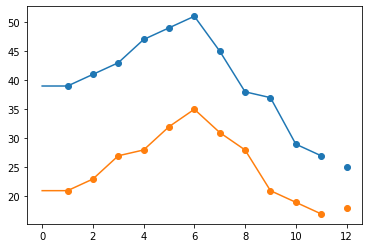

In [3]:
max_temp_model = SimpleExpSmoothing(max_temperature)
min_temp_model = SimpleExpSmoothing(min_temperature)
max_temp_model_fit = max_temp_model.fit()
min_temp_model_fit = min_temp_model.fit()
plt.scatter(month,max_temperature)
plt.plot(max_temp_model_fit.fittedvalues)
plt.scatter(month,min_temperature)
plt.plot(min_temp_model_fit.fittedvalues)

### Using sinusoidal waveform
We will be using a sinusoidal function of the function $y = Asin(Bt+C)+D$ to fit the curve to the given data.

In [4]:
def func(x,a,b,c,d):
    return a*np.sin(b*x+c)+d

In [5]:
#finding the optimum coefficients
min_temp_opt_params,_ = optimize.curve_fit(func,month,min_temperature)
max_temp_opt_params,_ = optimize.curve_fit(func,month,max_temperature)

In [6]:
fitted_min_temperature = func(month,*min_temp_opt_params)
fitted_max_temperature = func(month,*max_temp_opt_params)

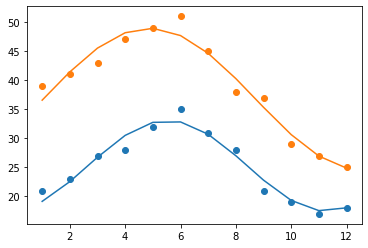

In [8]:
plt.plot(month,fitted_min_temperature)
plt.scatter(month,min_temperature)
plt.plot(month,fitted_max_temperature)
plt.scatter(month,max_temperature)